### 1. Data Collection from APIs

# Attomda Data Collection

This script connects to the ATTOM Property API to retrieve property information based on a specified postal code. The response is then normalized into a structured pandas DataFrame for further analysis.

In [ ]:
import requests
import pandas as pd

murl = "https://api.gateway.attomdata.com/"
call = "propertyapi/v1.0.0/property/address"
url = murl + call
params = {
    "postalcode": "82009",
    "page": "1",
    "pagesize" : "500"
}
headers = {
    "accept": "application/json",
    "apikey": ""
}
try:
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        
        properties = data.get("property", [])
        if not isinstance(properties, list):
            properties = [properties]
      
        df = pd.json_normalize(
            properties,
            sep='_'
        )
    else:
        print(f"Request failed with status code {response.status_code}")
        print(response.text)
except Exception as e:
    print(f"An error occurred: {e}")


Displays the first five rows of the normalized property data.

In [3]:
df.head()


,identifier_Id,identifier_fips,identifier_apn,identifier_attomId,address_country,address_countrySubd,address_line1,address_line2,address_locality,address_matchCode,...,location_geoid,location_geoIdV4_CO,location_geoIdV4_CS,location_geoIdV4_DB,location_geoIdV4_N4,location_geoIdV4_PL,location_geoIdV4_SB,location_geoIdV4_ZI,vintage_lastModified,vintage_pubDate
0,180053,56021,16885000400010,180053,US,WY,4009 CARLA DR,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,22b24a91277613b572bb847840bad23d,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, a12b93bb835a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
1,228520,56021,18015000247070,228520,US,WY,4707 HICKORY PL,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,ac4725a7497f492cc0bda6e12e09ed2d,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, 9ef520046d8a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
2,239936,56021,11054000400170,239936,US,WY,252 E IDAHO ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, RS00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
3,240202,56021,11054000900012,240202,US,WY,9420 MICHIGAN ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, SB00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
4,263622,56021,13923000600141,263622,US,WY,4717 MORAN AVE,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,5c0988930d223ac4d02a8c930641c123,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, 9ef520046d8a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22


In [4]:
df

,identifier_Id,identifier_fips,identifier_apn,identifier_attomId,address_country,address_countrySubd,address_line1,address_line2,address_locality,address_matchCode,...,location_geoid,location_geoIdV4_CO,location_geoIdV4_CS,location_geoIdV4_DB,location_geoIdV4_N4,location_geoIdV4_PL,location_geoIdV4_SB,location_geoIdV4_ZI,vintage_lastModified,vintage_pubDate
0,180053,56021,16885000400010,180053,US,WY,4009 CARLA DR,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,22b24a91277613b572bb847840bad23d,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, a12b93bb835a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
1,228520,56021,18015000247070,228520,US,WY,4707 HICKORY PL,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,ac4725a7497f492cc0bda6e12e09ed2d,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, 9ef520046d8a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
2,239936,56021,11054000400170,239936,US,WY,252 E IDAHO ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, RS00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
3,240202,56021,11054000900012,240202,US,WY,9420 MICHIGAN ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, SB00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
4,263622,56021,13923000600141,263622,US,WY,4717 MORAN AVE,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,5c0988930d223ac4d02a8c930641c123,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, 9ef520046d8a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8828243,56021,18265000100160,8828243,US,WY,400 E CARLSON ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,079e8e8fabf45c64bfbf5db0d878a7eb,802b98230660b6ebebd36a06ec9e541e,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
496,8828258,56021,12364000200050,8828258,US,WY,4801 MOUNTAIN RD,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, SB00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,e43b630f809ae2cd918a8ed63d15966d,802b98230660b6ebebd36a06ec9e541e,"26c640f6b7160b5a8774e22abe70c51b, 2adc253f6a97...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
497,8828259,56021,12364000200010,8828259,US,WY,4800 KING ARTHUR WAY,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,e43b630f809ae2cd918a8ed63d15966d,802b98230660b6ebebd36a06ec9e541e,"26c640f6b7160b5a8774e22abe70c51b, 2adc253f6a97...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
498,8828260,56021,12364000100010,8828260,US,WY,4801 KING ARTHUR WAY,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8f

In [5]:
df.columns

Index(['identifier_Id', 'identifier_fips', 'identifier_apn',
       'identifier_attomId', 'address_country', 'address_countrySubd',
       'address_line1', 'address_line2', 'address_locality',
       'address_matchCode', 'address_oneLine', 'address_postal1',
       'address_postal2', 'address_postal3', 'location_accuracy',
       'location_latitude', 'location_longitude', 'location_distance',
       'location_geoid', 'location_geoIdV4_CO', 'location_geoIdV4_CS',
       'location_geoIdV4_DB', 'location_geoIdV4_N4', 'location_geoIdV4_PL',
       'location_geoIdV4_SB', 'location_geoIdV4_ZI', 'vintage_lastModified',
       'vintage_pubDate'],
      dtype='object')

This code cleans the address_line2 column in the DataFrame by removing any 5-digit ZIP code that appears at the end of the address string.

In [6]:
df['address_line2'] = df['address_line2'].str.replace(r'\s*\d{5}$', '', regex=True)
df

,identifier_Id,identifier_fips,identifier_apn,identifier_attomId,address_country,address_countrySubd,address_line1,address_line2,address_locality,address_matchCode,...,location_geoid,location_geoIdV4_CO,location_geoIdV4_CS,location_geoIdV4_DB,location_geoIdV4_N4,location_geoIdV4_PL,location_geoIdV4_SB,location_geoIdV4_ZI,vintage_lastModified,vintage_pubDate
0,180053,56021,16885000400010,180053,US,WY,4009 CARLA DR,"CHEYENNE, WY",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,22b24a91277613b572bb847840bad23d,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, a12b93bb835a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
1,228520,56021,18015000247070,228520,US,WY,4707 HICKORY PL,"CHEYENNE, WY",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,ac4725a7497f492cc0bda6e12e09ed2d,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, 9ef520046d8a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
2,239936,56021,11054000400170,239936,US,WY,252 E IDAHO ST,"CHEYENNE, WY",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, RS00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
3,240202,56021,11054000900012,240202,US,WY,9420 MICHIGAN ST,"CHEYENNE, WY",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, SB00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
4,263622,56021,13923000600141,263622,US,WY,4717 MORAN AVE,"CHEYENNE, WY",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,5c0988930d223ac4d02a8c930641c123,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, 9ef520046d8a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8828243,56021,18265000100160,8828243,US,WY,400 E CARLSON ST,"CHEYENNE, WY",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,079e8e8fabf45c64bfbf5db0d878a7eb,802b98230660b6ebebd36a06ec9e541e,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
496,8828258,56021,12364000200050,8828258,US,WY,4801 MOUNTAIN RD,"CHEYENNE, WY",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, SB00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,e43b630f809ae2cd918a8ed63d15966d,802b98230660b6ebebd36a06ec9e541e,"26c640f6b7160b5a8774e22abe70c51b, 2adc253f6a97...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
497,8828259,56021,12364000200010,8828259,US,WY,4800 KING ARTHUR WAY,"CHEYENNE, WY",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,e43b630f809ae2cd918a8ed63d15966d,802b98230660b6ebebd36a06ec9e541e,"26c640f6b7160b5a8774e22abe70c51b, 2adc253f6a97...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
498,8828260,56021,12364000100010,8828260,US,WY,4801 KING ARTHUR WAY,"CHEYENNE, WY",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716

This code iterates over each row of the existing DataFrame df and sends a GET request to the ATTOM API’s property sale details endpoint using the addresses from address_line1 and address_line2 as query parameters.

Additionaly, it converts the collected property details into a flattened pandas DataFrame details_df and displays the first five rows.

In [ ]:
import requests
import pandas as pd

results = []

for idx, row in df.iterrows():
    params = {
        "address1": row['address_line1'],
        "address2": row['address_line2']
    }
    headers = {
        "accept": "application/json",
        "apikey": ""
    }
    try:
        response = requests.get(
            "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/detail",
            headers=headers,
            params=params
        )
        if response.status_code == 200:
            data = response.json()
            properties = data.get("property", [])
            if not isinstance(properties, list):
                properties = [properties]
            for prop in properties:
                results.append(prop)
        else:
            print(f"Failed for {params}: {response.status_code}")
    except Exception as e:
        print(f"Error for {params}: {e}")


details_df = pd.json_normalize(results, sep='_')
details_df.head()

Failed for {'address1': '4009 CARLA DR', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '4707 HICKORY PL', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '252 E IDAHO ST', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '9420 MICHIGAN ST', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '4717 MORAN AVE', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '4701 ONTARIO AVE', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '6901 WILLSHIRE BLVD', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '4755 MORAN AVE', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '729 APACHE ST', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '7812 YELLOWSTONE RD', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '1442 GILCHRIST RD', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '4756 MORAN AVE', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '1767 POWDERHOUSE RD', 'address2': 'CHEYENNE, WY'}: 401
Fail

KeyboardInterrupt: 

In [8]:
details_df = pd.DataFrame(results)
details_df = pd.json_normalize(results, sep='_')
details_df

""


In [11]:
results

[]

This line saves the details_df DataFrame to a CSV file named property_details.csv without including the index column.

In [ ]:
details_df.to_csv('property_details.csv', index=False)

This code defines a list of unnecessary columns to remove from the details_df DataFrame and then drops these columns. The errors='ignore parameter ensures that if any listed columns are not found, the operation proceeds without error.


In [ ]:
columns_to_drop = [
    "identifier_fips", "identifier_apn", "identifier_attomId",
    "area_loctype", "area_countrysecsubd", "area_countyuse1", "area_muncode",
    "area_munname", "address_country", "address_countrySubd", "address_line2",
    "address_matchCode", "address_oneLine", "address_postal1",
    "location_latitude", "location_longitude", "location_distance",
    "location_geoid", "location_geoIdV4_CS", "location_geoIdV4_DB",
    "location_geoIdV4_N4", "location_geoIdV4_PL", "location_geoIdV4_SB",
    "location_geoIdV4_ZI", "summary_absenteeInd", "summary_propclass",
    "summary_propsubtype", "summary_propLandUse", "summary_legal1",
    "building_interior_fplccount", "building_construction_condition",
    "building_construction_frameType", "building_summary_bldgsNum",
    "building_summary_view", "vintage_lastModified", "vintage_pubDate",
    "sale_salesearchdate", "sale_saleTransDate", "sale_amount_salerecdate",
    "sale_amount_saledisclosuretype", "sale_amount_saledoctype",
    "sale_amount_saledocnum", "sale_interfamily",
    "sale_resaleornewconstruction", "sale_cashormortgagepurchase",
    "sale_vintage_lastModified", "building_rooms_bathspartial",
    "building_summary_unitsCount", "lot_poolind", "area_srvyRange",
    "area_srvySection", "area_srvyTownship", "sale_foreclosure",
    "area_subdtractnum", "utilities_heatingfuel"
]

details_df = details_df.drop(columns=columns_to_drop, axis=1, errors='ignore')

In [ ]:
details_df.shape

(100, 50)

This code sends a GET request to a local API endpoint generate-property-data and, if successful, reads the CSV-formatted response text into a new pandas DataFrame new_df. If the request fails, it prints the corresponding status code.


In [ ]:
from io import StringIO
url = "http://127.0.0.1:8000/generate-property-data"
response = requests.get(url)
if response.status_code == 200:
    new_df = pd.read_csv(StringIO(response.text))
else:
    print(f"Request failed with status code {response.status_code}")

In [ ]:
new_df

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,1,1,0.10,4000,NO POOL,0,Subdivision 0,TX0,1000 Main St,City0,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,100000,100
1,2,2,0.15,4100,POOL,1,Subdivision 1,TX1,1001 Main St,City1,...,Colonial,House,TypeA,2,Average,Two Story,NONE,Full,101000,101
2,3,3,0.20,4200,NO POOL,2,Subdivision 2,TX2,1002 Main St,City2,...,Ranch,House,TypeA,3,Average,One Story,NONE,Full,102000,102
3,4,4,0.25,4300,POOL,3,Subdivision 3,TX0,1003 Main St,City3,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,103000,103
4,5,5,0.30,4400,NO POOL,4,Subdivision 4,TX1,1004 Main St,City4,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,104000,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,16,0.35,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000,115
496,497,17,0.40,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000,116
497,498,18,0.45,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000,117
498,499,19,0.50,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000,118


# 2. Data Integration 


This line merges the two DataFrames details_df and new_df by concatenating them vertically into a single DataFrame merged_df, resetting the index to ensure it’s continuous.


In [14]:
import pandas as np 

In [15]:
merged_df = pd.concat([details_df, new_df], ignore_index=True)

NameError: name 'new_df' is not defined

In [ ]:
merged_df

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,180053,1,0.172153,7499,NO POOL,4,PARK ESTATES,0150,4009 CARLA DR,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,NaN,NaN
1,228520,NaN,1.110000,48510,NO POOL,NaN,SHERIDAN COURT CONDOMINIUMS,0150,4707 HICKORY PL,CHEYENNE,...,CONDO/APARTMENT,COMMERCIAL,COMMERCIAL,2,FAIR,COMMERCIAL,000,Resale,131906.0,16.12
2,239936,"17,18",0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
3,240202,1,4.660000,202990,NaN,9,ALL AMERICA SUBDIVISION,0117,9420 MICHIGAN ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,335985.0,183.60
4,263622,"14,15",0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,496,16,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,497,17,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,498,18,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,499,19,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


In [ ]:
merged_df.drop("utilities_coolingtype" ,axis =1)

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,180053,1,0.172153,7499,NO POOL,4,PARK ESTATES,0150,4009 CARLA DR,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,NaN,NaN
1,228520,NaN,1.110000,48510,NO POOL,NaN,SHERIDAN COURT CONDOMINIUMS,0150,4707 HICKORY PL,CHEYENNE,...,CONDO/APARTMENT,COMMERCIAL,COMMERCIAL,2,FAIR,COMMERCIAL,000,Resale,131906.0,16.12
2,239936,"17,18",0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
3,240202,1,4.660000,202990,NaN,9,ALL AMERICA SUBDIVISION,0117,9420 MICHIGAN ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,335985.0,183.60
4,263622,"14,15",0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,496,16,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,497,17,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,498,18,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,499,19,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


This code removes the columns utilities_coolingtype and lot_lotnum from the merged_df DataFrame, ignoring errors if these columns don’t exist, and then displays the updated DataFrame.

In [ ]:
columns_to_drop = [
    "utilities_coolingtype",
    "lot_lotnum"
]
merged_df = merged_df.drop(columns=columns_to_drop, axis=1, errors='ignore')
merged_df

,identifier_Id,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,180053,0.172153,7499,NO POOL,4,PARK ESTATES,0150,4009 CARLA DR,CHEYENNE,5548,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,NaN,NaN
1,228520,1.110000,48510,NO POOL,NaN,SHERIDAN COURT CONDOMINIUMS,0150,4707 HICKORY PL,CHEYENNE,5122,...,CONDO/APARTMENT,COMMERCIAL,COMMERCIAL,2,FAIR,COMMERCIAL,000,Resale,131906.0,16.12
2,239936,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,8902,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
3,240202,4.660000,202990,NaN,9,ALL AMERICA SUBDIVISION,0117,9420 MICHIGAN ST,CHEYENNE,9613,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,335985.0,183.60
4,263622,0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,5218,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,496,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,ZIP2-95,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,497,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,ZIP2-96,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,498,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,ZIP2-97,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,499,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,ZIP2-98,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00



This code removes all rows in merged_df that contain any missing values using dropna(inplace=True). Then, it removes duplicate rows with drop_duplicates()

In [ ]:
merged_df.dropna(inplace=True)
merged_df.drop_duplicates()

,identifier_Id,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,239936,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,8902,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
4,263622,0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,5218,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
5,268220,0.137741,6000,NO POOL,17,PARK PLAZA TECH CENTER,0150,4701 ONTARIO AVE,CHEYENNE,5633,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,276760.0,303.46
8,278288,0.211777,9225,NO POOL,14,INDIAN HILLS,0150,729 APACHE ST,CHEYENNE,4220,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,LOW,CONVENTIONAL HOUSE,000,Resale,264528.0,229.63
13,336047,0.209091,9108,NO POOL,3,YELLOWSTONE ADDITION,0150,132 DELL RANGE BLVD,CHEYENNE,4706,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,496,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,ZIP2-95,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,497,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,ZIP2-96,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,498,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,ZIP2-97,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,499,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,ZIP2-98,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


In [ ]:
merged_df[merged_df.astype(str).apply(lambda x: x.str.contains('\?')).any(axis=1)]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
C:\Users\alsai\AppData\Local\Temp\ipykernel_20964\2564920339.py:1: SyntaxWarning: invalid escape sequence '\?'
  merged_df[merged_df.astype(str).apply(lambda x: x.str.contains('\?')).any(axis=1)]


,identifier_Id,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit


This code drops the column "identifier_Id" from the merged_df DataFrame, ignoring any errors if the column is not present, and then displays the updated DataFrame.


In [ ]:
columns_to_drop = [
    "identifier_Id"
]
merged_df = merged_df.drop(columns=columns_to_drop, axis=1, errors='ignore')
merged_df

,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,8902,H056,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
4,0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,5218,C036,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
5,0.137741,6000,NO POOL,17,PARK PLAZA TECH CENTER,0150,4701 ONTARIO AVE,CHEYENNE,5633,C041,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,276760.0,303.46
8,0.211777,9225,NO POOL,14,INDIAN HILLS,0150,729 APACHE ST,CHEYENNE,4220,C045,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,LOW,CONVENTIONAL HOUSE,000,Resale,264528.0,229.63
13,0.209091,9108,NO POOL,3,YELLOWSTONE ADDITION,0150,132 DELL RANGE BLVD,CHEYENNE,4706,C043,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,ZIP2-95,ZIP3-45,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,ZIP2-96,ZIP3-46,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,ZIP2-97,ZIP3-47,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,ZIP2-98,ZIP3-48,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


In [ ]:
merged_df[merged_df.astype(str).apply(lambda x: x.str.contains('\#')).any(axis=1)]

<>:1: SyntaxWarning: invalid escape sequence '\#'
<>:1: SyntaxWarning: invalid escape sequence '\#'
C:\Users\alsai\AppData\Local\Temp\ipykernel_20964\3679867213.py:1: SyntaxWarning: invalid escape sequence '\#'
  merged_df[merged_df.astype(str).apply(lambda x: x.str.contains('\#')).any(axis=1)]


,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit


In [ ]:
merged_df[merged_df.astype(str).apply(lambda x: x.str.contains('\&')).any(axis=1)]

<>:1: SyntaxWarning: invalid escape sequence '\&'
<>:1: SyntaxWarning: invalid escape sequence '\&'
C:\Users\alsai\AppData\Local\Temp\ipykernel_20964\1967820778.py:1: SyntaxWarning: invalid escape sequence '\&'
  merged_df[merged_df.astype(str).apply(lambda x: x.str.contains('\&')).any(axis=1)]


,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit


This line saves the current state of the merged_df DataFrame to a CSV file named data_uncleaned.csv including the index by default.


In [ ]:
merged_df.to_csv("data_uncleaned.csv")

This code converts the columns area_blockNum and building_parking_prkgSpaces to integer type. For the area_taxcodearea column, it replaces the string TX with 0, converts the column to numeric (coercing errors to NaN), fills those NaNs with zero, and then converts to integer type. Finally, it drops the column building_summary_viewCode from merged_df (if present) and displays the updated DataFrame.


In [ ]:
merged_df['area_blockNum'] = merged_df['area_blockNum'].astype(int)
merged_df['area_taxcodearea'] = pd.to_numeric(
    merged_df['area_taxcodearea'].replace('TX', 0), errors='coerce'
).fillna(0).astype(int)
merged_df['building_parking_prkgSpaces'] = merged_df['building_parking_prkgSpaces'].astype(int)

columns_to_drop = ['building_summary_viewCode']
merged_df = merged_df.drop(columns=columns_to_drop, axis=1, errors='ignore')
merged_df

,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_parking_prkgType,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,117,252 E IDAHO ST,CHEYENNE,8902,H056,...,"Garage, Detached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,Resale,253521.0,185.59
4,0.223829,9750,NO POOL,6,FRONTIER GARDENS,150,4717 MORAN AVE,CHEYENNE,5218,C036,...,Mixed,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,Resale,357688.0,372.59
5,0.137741,6000,NO POOL,17,PARK PLAZA TECH CENTER,150,4701 ONTARIO AVE,CHEYENNE,5633,C041,...,"Garage, Attached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,Resale,276760.0,303.46
8,0.211777,9225,NO POOL,14,INDIAN HILLS,150,729 APACHE ST,CHEYENNE,4220,C045,...,"Garage, Detached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,LOW,CONVENTIONAL HOUSE,Resale,264528.0,229.63
13,0.209091,9108,NO POOL,3,YELLOWSTONE ADDITION,150,132 DELL RANGE BLVD,CHEYENNE,4706,C043,...,"Garage, Attached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,Resale,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.350000,8500,POOL,5,Subdivision 0,0,1495 Main St,City5,ZIP2-95,ZIP3-45,...,Garage,Colonial,House,TypeA,1,Average,Two Story,Full,595000.0,115.00
596,0.400000,8600,NO POOL,6,Subdivision 1,0,1496 Main St,City6,ZIP2-96,ZIP3-46,...,Garage,Ranch,House,TypeA,2,Average,One Story,Full,596000.0,116.00
597,0.450000,8700,POOL,7,Subdivision 2,0,1497 Main St,City7,ZIP2-97,ZIP3-47,...,Garage,Colonial,House,TypeA,3,Average,Two Story,Full,597000.0,117.00
598,0.500000,8800,NO POOL,8,Subdivision 3,0,1498 Main St,City8,ZIP2-98,ZIP3-48,...,Garage,Ranch,House,TypeA,1,Average,One Story,Full,598000.0,118.00


This code uses LabelEncoder from scikit-learn to convert categorical text columns into numeric labels. It iterates over a specified list of columns, checks if each exists in merged_df, and applies label encoding to transform their categorical values into integer codes for machine learning compatibility.


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = [
    'lot_pooltype', 'area_subdname',
    'address_line1', 'address_locality','address_postal2','address_postal3','location_accuracy',
    'location_geoIdV4_CO','summary_proptype','summary_propertyType','summary_propIndicator','utilities_heatingtype',
    'building_size_sizeInd','building_interior_bsmttype','building_interior_fplcind','building_interior_fplctype',
    'building_construction_constructiontype','building_construction_roofcover','building_construction_roofShape',
    'building_construction_wallType','building_parking_garagetype','building_parking_prkgType','building_summary_archStyle',
    'building_summary_bldgType','building_summary_imprType','building_summary_quality','building_summary_storyDesc','building_summary_viewCode',
    'sale_amount_saletranstype'
]
for column in columns_to_encode:
    if column in merged_df.columns:
        merged_df[column] = label_encoder.fit_transform(merged_df[column])

In [ ]:
merged_df

,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_parking_prkgType,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,0.826446,36000,0,4,0,117,504,0,13,6,...,3,2,0,0,1,0,0,1,253521.0,185.59
4,0.223829,9750,0,6,4,150,506,0,11,1,...,4,2,0,0,1,2,0,1,357688.0,372.59
5,0.137741,6000,0,17,6,150,505,0,12,2,...,1,2,0,0,1,2,0,1,276760.0,303.46
8,0.211777,9225,0,14,5,150,516,0,2,4,...,3,2,0,0,1,3,0,1,264528.0,229.63
13,0.209091,9108,0,3,14,150,321,0,3,3,...,1,2,0,0,1,2,0,1,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.350000,8500,1,5,8,0,498,6,109,47,...,0,1,1,2,1,1,3,0,595000.0,115.00
596,0.400000,8600,0,6,9,0,499,7,110,48,...,0,3,1,2,2,1,2,0,596000.0,116.00
597,0.450000,8700,1,7,10,0,500,8,111,49,...,0,1,1,2,3,1,3,0,597000.0,117.00
598,0.500000,8800,0,8,11,0,501,9,112,50,...,0,3,1,2,1,1,2,0,598000.0,118.00


This line saves the updated merged_df DataFrame—with encoded categorical columns and data type changes—to a CSV file named data_changed.csv.


In [ ]:
merged_df.to_csv("data_changed.csv")

### 3. Predictive Modeling 

This code performs supervised machine learning using three regression models—Gradient Boosting Regressor, Decision Tree Regressor, and Random Forest Regressor—to predict property sale prices.

In [ ]:
from sklearn.model_selection import train_test_split
X = merged_df.drop(columns=['sale_amount_saleamt','sale_calculation_pricepersizeunit'])
y = merged_df['sale_amount_saleamt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor MSE: {mse_gb:.2f}")
print(f"Gradient Boosting Regressor R² Score: {r2_gb:.2f}")

Gradient Boosting Regressor MSE: 486027802.44
Gradient Boosting Regressor R² Score: 0.98


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor MSE: {mse_dt:.2f}")
print(f"Decision Tree Regressor R² Score: {r2_dt:.2f}")

Decision Tree Regressor MSE: 1033458102.93
Decision Tree Regressor R² Score: 0.95


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 3652.63
Mean Squared Error (MSE): 274327737.88
Root Mean Squared Error (RMSE): 16562.84
R-squared (R2): 0.99


### Plotting Actual vs. Predicted Sale 

This code visualizes the performance of each regression model (Gradient Boosting, Decision Tree, and Random Forest) by plotting the actual sale amounts (y_test) against the predicted sale amounts. A red diagonal line represents perfect prediction (where predicted = actual), allowing easy comparison of model accuracy. Each model's results are displayed in a separate subplot for side-by-side analysis.

GradientBoosting Regression

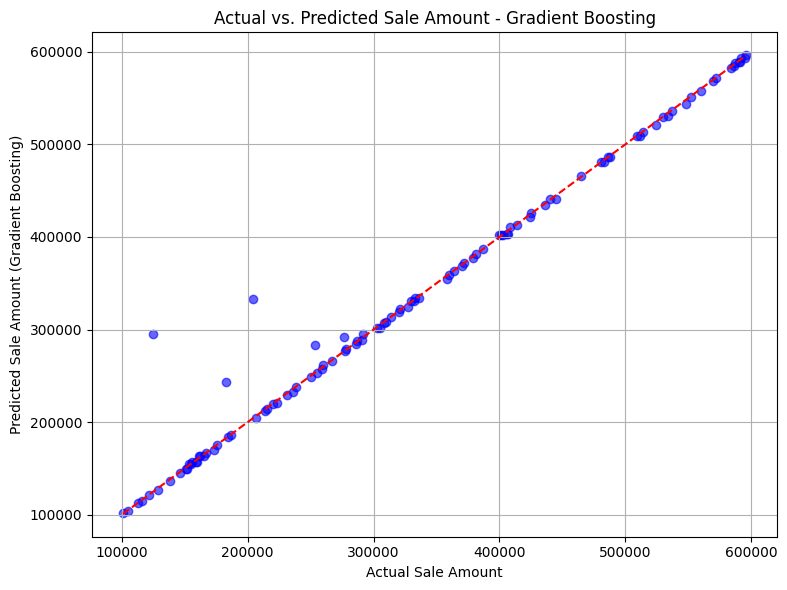

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount (Gradient Boosting)")
plt.title("Actual vs. Predicted Sale Amount - Gradient Boosting")
plt.grid(True)
plt.tight_layout()
plt.show()


Decision Tree Regression

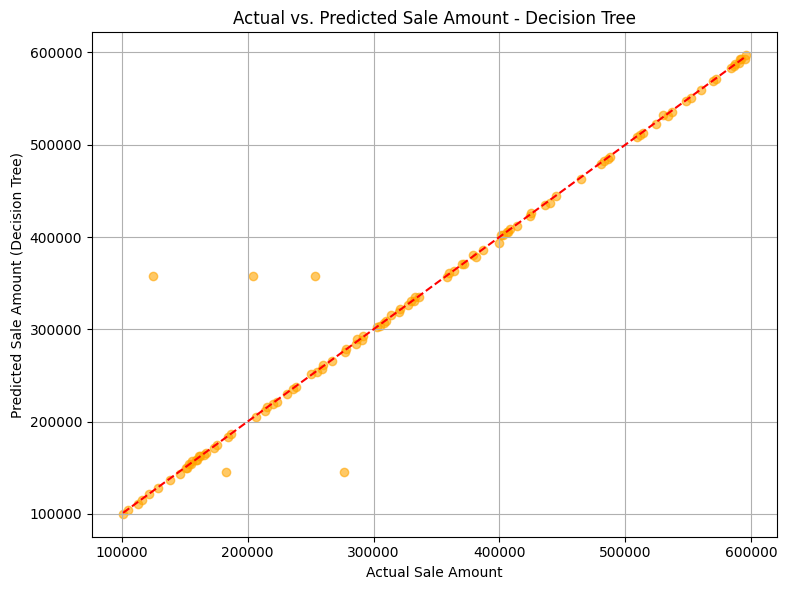

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount (Decision Tree)")
plt.title("Actual vs. Predicted Sale Amount - Decision Tree")
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest Regression 

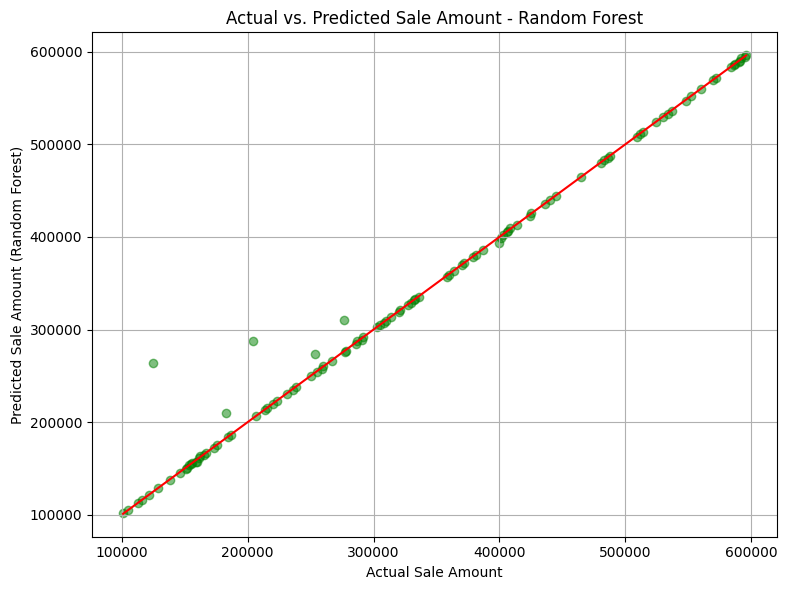

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount (Random Forest)")
plt.title("Actual vs. Predicted Sale Amount - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()